# Segmentação da barra de escala

Recursos:
* Filtro de sobel horizontal
* https://www.pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/
* Geração de contornos pelo opencv
* Aula04 - Erosão Rotulação e Contornos

In [2]:
# Autoreload para imports
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


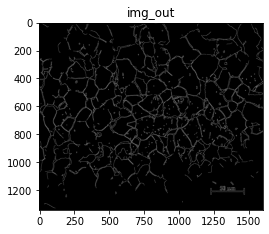

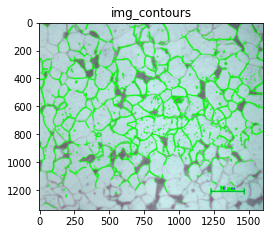

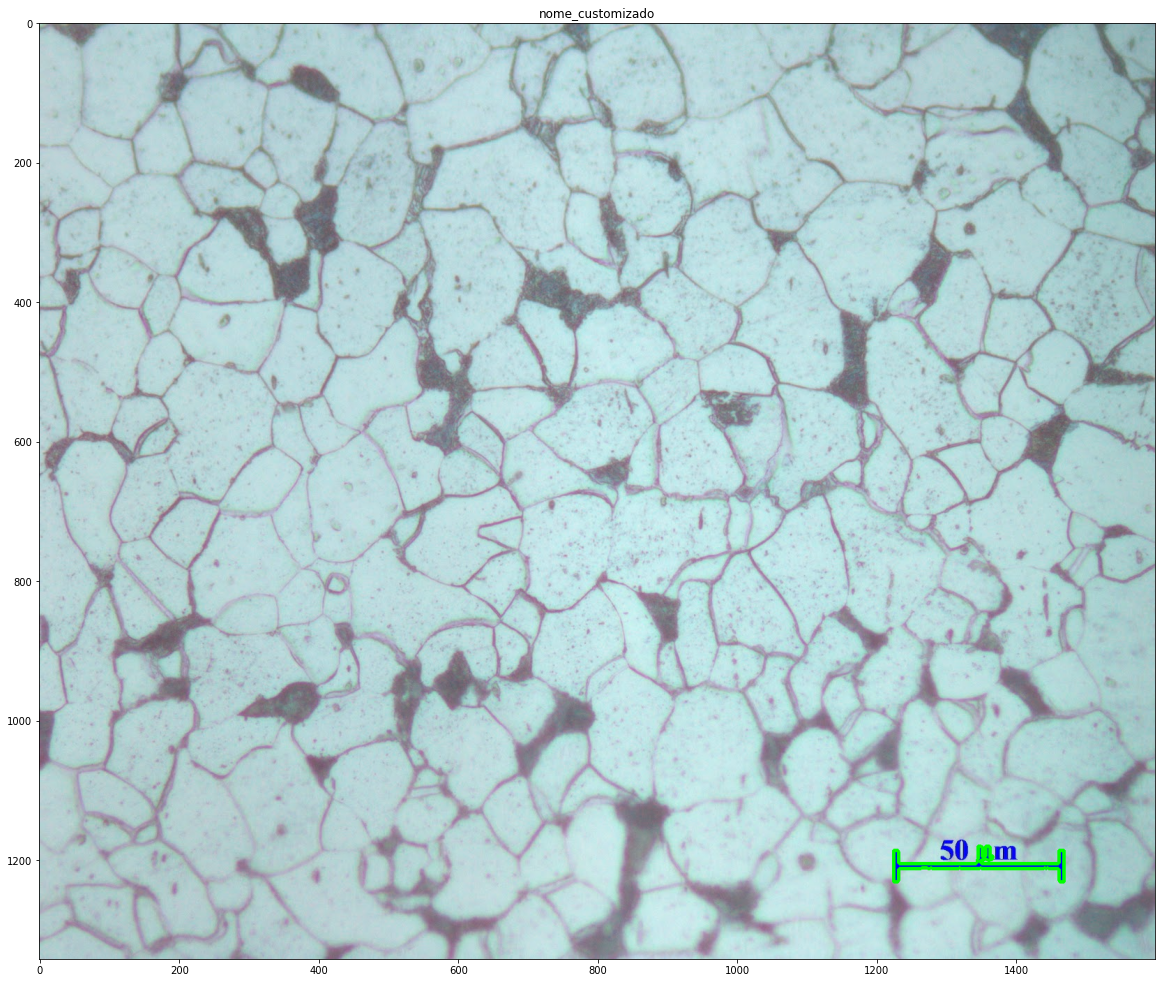

In [13]:
#importanto open cv
import cv2
import matplotlib.pyplot as plt
import numpy as np
from segmentation_contour_utils import *
%autoreload

# Lendo imagem
img = cv2.imread("data/Aco224.jpg")

# Aplicando filtros
img_out = filter0(img)

# Resultados
small = (4,4)
imgplot(img_out, size=small)

### Obtendo contornos
contours, img_contours = get_contours(img, img_out, color=(0,255,0), thickness=3)
imgplot(img_contours, size=small)

# Ordenando lista de contornos
contours = find_scale_contour(contours)

#Desenhando Contornos na imagem original
verde = (0,255,0)
img_contours = cv2.drawContours(img.copy(), contours[0:1], -1, verde, 3)
imgplot(img_contours, size=(20,20), name="nome_customizado")

## Funções definidas para o OCR de número de escala. Use como referência

In [ ]:
def tesseract_byColors(img_in, color_mins=[(0,0,0)], color_maxs=[(255,255,255)], results=[],numbers=[],confs=[], display=False):
    img_hsv = cv2.cvtColor(img_in.copy(), cv2.COLOR_BGR2HSV)
    
    for c0, c1 in zip(color_mins, color_maxs):
        mask = cv2.inRange(img_hsv, c0, c1)
        img_masked = img_hsv.copy()
        if c0[0]==c0[1]==c0[2]!=0:
            img_masked = ~img_masked
        #img_masked = cv2.bitwise_and(img_masked, img_masked, mask=mask)
        img_masked[mask==0]=rgb2hsv((255,255,255)) # turning white
        img_out = cv2.cvtColor(img_masked, cv2.COLOR_HSV2RGB)

        tesseract_img2numbers(img_out,results,numbers,confs,str(c0),display)

In [ ]:
# Color masking RGB
            #          reds         greens          blues            any          darks         lights
color_mins = [  (0,100,100),   (200,0,200),   (200,200,0),       (0,0,0),    (55,55,55),       (0,1,0)]
color_maxs = [(255,255,255), (255,255,255), (255,255,255), (255,255,255), (255,255,255), (200,200,200)]
tesseract_byColors(img, color_mins, color_maxs, results,numbers,confs, display=True)


In [ ]:
# MULTIPLE IMAGES

def tesseract_byFolder(basepath="./"):
    acc = []
    for file in os.listdir(basepath):
        filepath = os.path.join(basepath, file)
        if os.path.isfile(filepath) and isimageformat(filepath) and (file in mapping.keys()) and mapping[file]>0:
            print("File:", filepath)
            print("Truth:", mapping[file])
            results = []; numbers = []; confs = []

            # Opening the image
            img = cv2.imread(filepath)

            # Reshape
            shape_old = img.shape[:2]
            if min(shape_old)<500:
                factor = 2
                img = cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR)
                print("Reshape:", shape_old, "->", img.shape[:2])
            elif min(shape_old)<600:
                factor = 1.5
                img = cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR)
                print("Reshape:", shape_old, "->", img.shape[:2])

            # Color masking RGB
                        # reds          greens       blues        any      darks       lights
            color_mins = [(0,150,150), (150,0,150), (150,150,0), (0,0,0), (50,50,50), (1,1,1)]
            color_maxs = [(255,255,255), (255,255,255), (255,255,255), (255,255,255), (50,50,50)]
            tesseract_byColors(img, color_mins, color_maxs, results,numbers,confs, display=False)

            # Filters
            tesseract_byFilters(img, results, numbers, confs, display=False)

            # Results
            results = tesseract_results(results, img, file)

            if results[0][0] == mapping[file]:
                acc.append(1)
            else:
                acc.append(0)
            print()
    print("acc:",acc)
    print("acc-sum:",sum(acc),'/',len(acc))

# Tesseract Parameters
custom_config = r'--oem 3 --psm 11'# outputbase digits'
#custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
#custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
#custom_config = r'-l eng --psm 6'

# Applying function
basepath = 'data/'
tesseract_byFolder(basepath)
